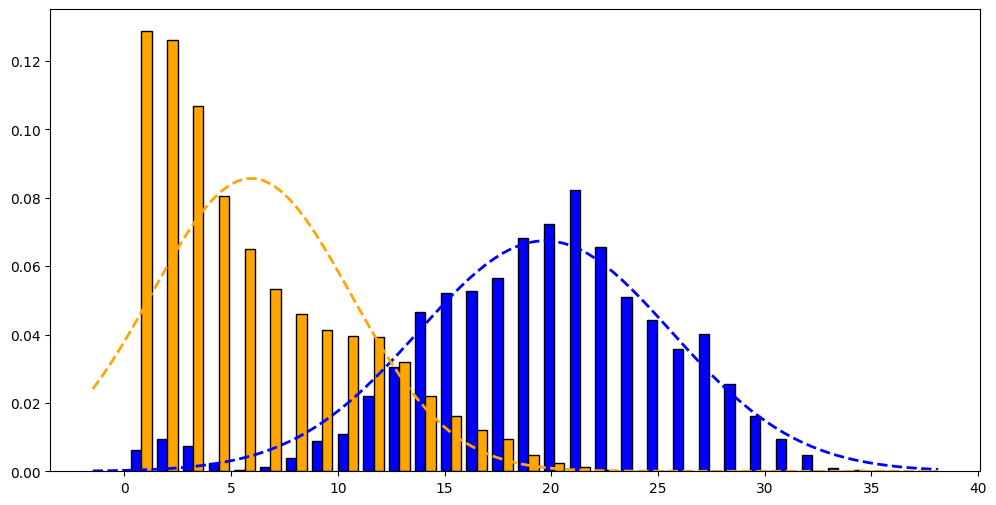

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import fsolve
from scipy.integrate import quad
import laspy


    
laz_file_path = r'C:\Users\JooHyunAhn\Interpine\DataSets\TreeTools_PlayGroundSet\removing_ambigous_area\mb17t1a_C2_0_0_hnom.laz'

# Read LAS file
laz_file = laspy.read(laz_file_path)

# Access specific attributes
z_scaled = laz_file.z  # ScaledArrayView
height = np.array(z_scaled)
label = laz_file.label

# Get indices of points with the target label
height_indices_veg = height[label == 2]
height_indices_stem = height[label == 4]

# Create a histogram with two datasets
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size here
hist_data, bin_edges, _ = ax.hist([height_indices_veg, height_indices_stem], bins=30, density=True, color=['blue', 'orange'], edgecolor='black', label=['Veg', 'Stem'])

# Plot the probability density functions
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
pdf_data1 = norm.pdf(x_range, np.mean(height_indices_veg), np.std(height_indices_veg))
pdf_data2 = norm.pdf(x_range, np.mean(height_indices_stem), np.std(height_indices_stem))

ax.plot(x_range, pdf_data1, color='blue', linestyle='dashed', linewidth=2, label='PDF Veg')
ax.plot(x_range, pdf_data2, color='orange', linestyle='dashed', linewidth=2, label='PDF Stem')

# # Find the intersection point
# def intersection_point(x):
#     return norm.pdf(x, np.mean(height_indices_veg), np.std(height_indices_veg)) - norm.pdf(x, np.mean(height_indices_stem), np.std(height_indices_stem))

# # Initial guess for the intersection point
# initial_guess = 0.5 * (np.mean(height_indices_veg) + np.mean(height_indices_stem))

# # Use fsolve to find the intersection
# print(type(intersection_point))
# intersection_x = fsolve(intersection_point, initial_guess)[0]

# # Calculate the size of the intersection
# def min_pdf(x):
#     return min(norm.pdf(x, np.mean(height_indices_veg), np.std(height_indices_veg)),
#                norm.pdf(x, np.mean(height_indices_stem), np.std(height_indices_stem)))
# print("min_pdf", min_pdf)
# intersection_size, _ = quad(min_pdf, xmin, xmax)
# print("intersection_size", intersection_size)

# # Create a mask for the intersection area
# intersection_mask = np.logical_and(pdf_data1 > 0, pdf_data2 > 0)

# # Extract the data points corresponding to the intersection area
# intersection_data_range = x_range[intersection_mask]

# # Plot the intersection point
# ax.axvline(intersection_x, color='red', linestyle='dashed', linewidth=2, label='Intersection Point')

# # Plot the intersection area
# ax.scatter(intersection_data_range, np.zeros_like(intersection_data_range), color='green', label='Intersection Area', alpha=0.5)

# # Calculate the IQR from the intersection data
# intersection_iqr_size = np.percentile(intersection_data_range, 75) - np.percentile(intersection_data_range, 25)

# # Plot the IQR range for intersection data
# ax.axvline(intersection_x - 0.5 * intersection_iqr_size, color='blue', linestyle='dashed', linewidth=2, label='Lower IQR Bound (Intersection)')
# ax.axvline(intersection_x + 0.5 * intersection_iqr_size, color='blue', linestyle='dashed', linewidth=2, label='Upper IQR Bound (Intersection)')

# # Calculate and plot the 25% and 75% percentiles for intersection data
# percentile_25 = np.percentile(intersection_data_range, 25)
# percentile_75 = np.percentile(intersection_data_range, 75)

# ax.axvline(percentile_25, color='green', linestyle='dashed', linewidth=2, label='25% Percentile (Intersection)')
# ax.axvline(percentile_75, color='orange', linestyle='dashed', linewidth=2, label='75% Percentile (Intersection)')

# # Calculate and plot the IQR for pdf_data1 (Veg)
# veg_iqr_size = np.percentile(pdf_data1, 75) - np.percentile(pdf_data1, 25)
# ax.axvline(np.mean(height_indices_veg) - 0.5 * veg_iqr_size, color='purple', linestyle='dashed', linewidth=2, label='Lower IQR Bound (PDF Veg)')
# ax.axvline(np.mean(height_indices_veg) + 0.5 * veg_iqr_size, color='purple', linestyle='dashed', linewidth=2, label='Upper IQR Bound (PDF Veg)')

# # Calculate and plot the IQR for pdf_data2 (Stem)
# stem_iqr_size = np.percentile(pdf_data2, 75) - np.percentile(pdf_data2, 25)
# ax.axvline(np.mean(height_indices_stem) - 0.5 * stem_iqr_size, color='brown', linestyle='dashed', linewidth=2, label='Lower IQR Bound (PDF Stem)')
# ax.axvline(np.mean(height_indices_stem) + 0.5 * stem_iqr_size, color='brown', linestyle='dashed', linewidth=2, label='Upper IQR Bound (PDF Stem)')

# # Calculate the proportion below and above a given height range
# min_height = 10
# max_height = 14


# # Plot vertical lines for min_height and max_height
# ax.axvline(min_height, color='gray', linestyle='dashed', linewidth=2, label='Min Height')
# ax.axvline(max_height, color='gray', linestyle='dashed', linewidth=2, label='Max Height')

# # Customize the plot
# ax.set_title(f'Histogram with PDFs, Intersection, IQR, and Percentiles\nIntersection Size: {intersection_size:.4f}, IQR Size (Intersection): {intersection_iqr_size:.4f}, IQR Size (PDF Veg): {veg_iqr_size:.4f}, IQR Size (PDF Stem): {stem_iqr_size:.4f}')
# ax.set_xlabel('Height')
# ax.set_ylabel('Frequency / PDF')
# ax.legend()

# # # Show the plot
# # plt.show()

# # Return the intersection point x-value, intersection size, IQR size (Intersection), IQR size (PDF Veg), IQR size (PDF Stem), and intersection data range
# print("Intersection Point:", intersection_x)
# print("Intersection Size:", intersection_size)
# print("IQR Size from Intersection Data:", intersection_iqr_size)
# print("25% Percentile (Intersection):", percentile_25)
# print("75% Percentile (Intersection):", percentile_75)
# # print("Intersection Data Range:", intersection_data_range)
# print("IQR Size (PDF Veg):", veg_iqr_size)
# print("IQR Size (PDF Stem):", stem_iqr_size)

# # Proportion below the given height range
# proportion_below = np.mean(intersection_data_range < min_height)

# # Proportion above the given height range
# proportion_above = np.mean(intersection_data_range > max_height)

# # Proportion between the given height range
# proportion_between = 1 - (proportion_below + proportion_above)

# print(f"Proportion below {min_height}: {proportion_below:.2%}")
# print(f"Proportion above {max_height}: {proportion_above:.2%}")
# print(f"Proportion between {min_height} and {max_height}: {proportion_between:.2%}")

# # Draw lines for the specified height range
# ax.axvline(min_height, color='purple', linestyle='dashed', linewidth=2, label=f'Min Height ({min_height})')
# ax.axvline(max_height, color='purple', linestyle='dashed', linewidth=2, label=f'Max Height ({max_height})')

# # Customize the plot
# ax.set_title(f'Histogram with PDFs, Intersection, IQR, and Percentiles\nIntersection Size: {intersection_size:.4f}, IQR Size (Intersection): {intersection_iqr_size:.4f}, IQR Size (PDF Veg): {veg_iqr_size:.4f}, IQR Size (PDF Stem): {stem_iqr_size:.4f}')
# ax.set_xlabel('Height')
# ax.set_ylabel('Frequency / PDF')
# ax.legend()

# # Save the plot to a file
# # fig.savefig(r'C:\Users\JooHyunAhn\Interpine\GitRepos\3d-pointcloud-materials\test.png')

# # Show the plot
plt.show()
